#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**

###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Genaro Rodriguez Vazquez A01150931
*   Juan Pablo Acosta López - A01794035
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import seaborn as sns 

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from tabulate import tabulate

# models from sklearn to test
from sklearn.dummy import DummyRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
import math as math


In [2]:
df = pd.read_csv('dataset_Facebook.csv', sep=";")
df  

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


        #**Ejercicio-1.**
En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las mejores en el artículo antes citado: ‘Lifetime People who have liked a Page and engaged with a post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables que indican los autores en la Tabla 3 del artículo citado. 


In [3]:
"""
Lifetime People who have liked your Page and engaged with your post:
The number of people who have liked a Page
and clicked anywhere in a post (Unique
users)"""

df_y = df[["Lifetime People who have liked your Page and engaged with your post"]].copy()
df_y = df_y.rename(columns={"Lifetime People who have liked your Page and engaged with your post":"LPE"})
df_y.head(10)

,LPE
0,119
1,1108
2,132
3,1386
4,396
5,1016
6,379
7,422
8,1250
9,199


In [4]:
df_X = df.copy()
df_X = df_X[["Category", "Page total likes", "Type", "Post Month" , "Post Hour" , "Post Weekday", "Paid"]].copy()
df_X

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0
...,...,...,...,...,...,...,...
495,3,85093,Photo,1,2,7,0.0
496,2,81370,Photo,1,8,5,0.0
497,1,81370,Photo,1,2,5,0.0
498,3,81370,Photo,1,11,4,0.0


    #**Ejercicio-2.**
Realiza una partición de los datos con 100 datos de Prueba y el resto para entrenamiento y validación

In [5]:
y = df_y
X = df_X


Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.2)

print(Xtv.shape, ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada "X" para prueba')  

print(ytv.shape, ': dimensión de variable de salida  "Y" para  entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida "Y" para prueba')


(400, 7) : dimensión de datos de entrada "X" para entrenamiento y validación
(100, 7) : dimensión de datos de entrada "X" para prueba
(400, 1) : dimensión de variable de salida  "Y" para  entrenamiento y validación
(100, 1) : dimensión de variable de salida "Y" para prueba


    #**Ejercicio-3.**
Definirás tus propias funciones de errores para este problema de regresión. Los errores que 
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el 
error porcentual absoluto medio MAPE.

In [6]:
def mi_RMSE(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

# Incluye aquí las líneas de código que definan a la función: mi_MAE:
def mi_MAE(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs(actual - predicted))

# Incluye aquí las líneas de código que definan a la función: mi_MAPE:
def mi_MAPE(actual,predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

    #Ejercicio 4
En la página de la UCI, así como en el artículo de los autores previamente citado encuentras 
información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo 
las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. 
Utiliza un Pipeline para evitar el filtrado de información. 


In [7]:
df =  df_X.join(df_y) 
df

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,LPE
0,2,139441,Photo,12,3,4,0.0,119
1,2,139441,Status,12,10,3,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,10,2,1.0,1386
4,2,139441,Photo,12,3,2,0.0,396
...,...,...,...,...,...,...,...,...
495,3,85093,Photo,1,2,7,0.0,392
496,2,81370,Photo,1,8,5,0.0,301
497,1,81370,Photo,1,2,5,0.0,363
498,3,81370,Photo,1,11,4,0.0,370


Tipos de variables: 
Category              int64
Page total likes      int64
Type                 object
Post Month            int64
Post Hour             int64
Post Weekday          int64
Paid                float64
LPE                   int64
dtype: object
distribuciones de las variables: 


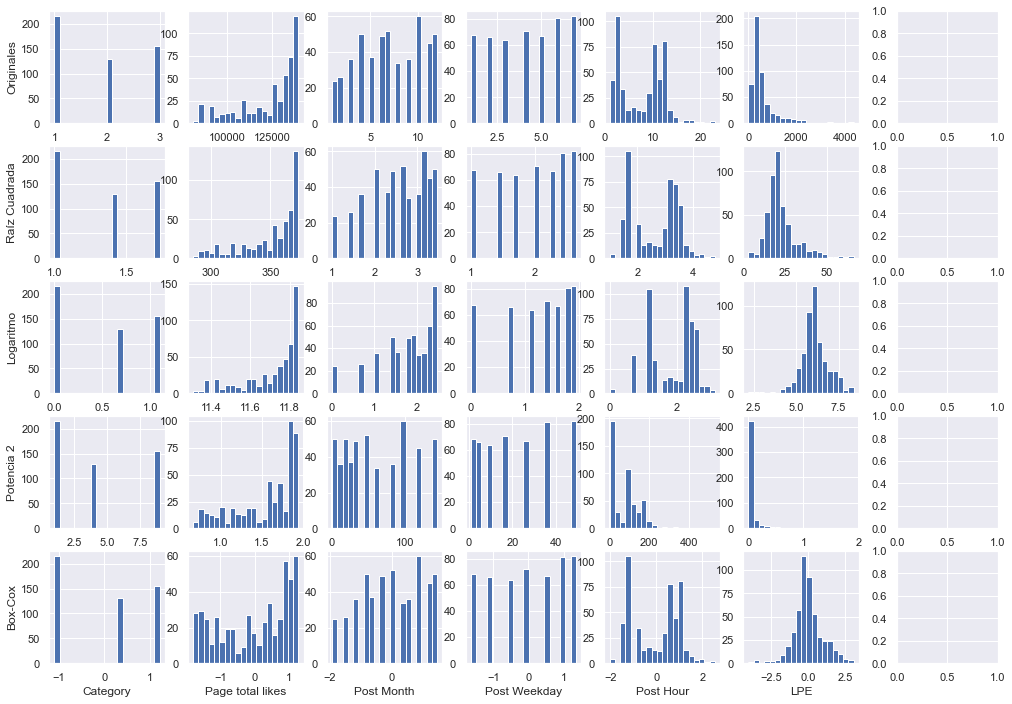

In [8]:
#Esto se aplica sólo para ver cuál es la mejor transformación para cada tipo de variable
variables_a_transformar = ['Category', 'Page total likes','Post Month','Post Weekday','Post Hour','LPE']

num_iterations = (int(len(variables_a_transformar)))

Plotdf = pd.DataFrame(df)
Plotdf.dropna(inplace=True)

print('Tipos de variables: ')
print(Plotdf.dtypes)
print('distribuciones de las variables: ')

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(5, 8)    

for k in range(0,num_iterations):       
     # Datos originales ---------------------------------------------------------
    plt.subplot(5,7,k+1) 

    Transf0 = Plotdf[variables_a_transformar[k]]        #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(Transf0,bins=20)                   #  En este línea agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Originales')
    
    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(5,7,k+8)    

    Transf1 = np.sqrt(Plotdf[variables_a_transformar[k]] )          #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(Transf1,bins=20)                    #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Raíz Cuadrada')
    
    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(5,7,k+15)     

    Transf2 = np.log(Plotdf[variables_a_transformar[k]] )          #  En esta línea se debe aplicar el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(Transf2,bins=20)                     #  En este línea agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Logaritmo')
    
    # Datos transformados con la potencia de 2 ---------------------------------
    plt.subplot(5,7,k+22)

    Transf3 = np.square(Plotdf[variables_a_transformar[k]] )          #  En esta línea debes elevar al cuadrado los valores de cada variable "k" sin transformar.
    plt.hist(Transf3,bins=20)                   #  En este línea agrega el comando para obtener el histograma de Transf3 con 20 barras (bins).


    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Potencia 2')
    
    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(5,7,k+29)

    Transf4 = power_transform(np.array(df[variables_a_transformar[k]]).reshape(-1,1),method="box-cox")          #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(Transf4,bins=20)                    #En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).

    plt.xlabel(variables_a_transformar[k])
    if k==0:
      plt.ylabel('Box-Cox')

    # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
    ################################################################################################################

plt.show()

A description of each variable

#"Category"
"""Manual content characterization: action (special offers and
contests), product (direct advertisement, explicit brand content),
and inspiration (non-explicit brand related content)"""

#"Page total likes"
"""Number of people who have liked the company's page"""

#"Type"
"""Type of content (Link, Photo, Status, Video)."""

#"Post Month"
"""Month the post was published (January, February, March, …,December)."""

#"Post Hour"
"""Hour the post was published (0, 1, 2, 3, 4, …, 23)"""

#"Post Weekday"
"""Weekday the post was published (Sunday, Monday, …, Saturday)."""

#"Paid"
"""If the company paid to Facebook for advertising (yes, no)"""

#"LPE"
"""The number of people who have liked a Page and clicked anywhere in a post (Unique users)"""


In [9]:
#Se observa que la transformación box-cox es la mejor para las variables numéricas continuas.
#Se observa que la variable binara 'paid' tiene que siempre ser convertida en booleana
#Además se requiere de hacer inputaciones por que existen valores nulos

NumericList = ['Page total likes','Post Month','Post Weekday','Post Hour']
NumericalCategoricalList = ['Category']
StringCategoricalList = ['Type']
BinaryList = ['Paid']

#Define each pipeline for each type of category in the Dependent variables
NumericColumnsPipeline = Pipeline(steps= [('box-cox', PowerTransformer(method= 'box-cox')),('NumericInputter', SimpleImputer(strategy='median'))])
NumericalCategoricalColumnsPipeline = Pipeline(steps= [('NumericalCategoricalInputter', SimpleImputer(strategy='most_frequent'))])
StringCategoricalPipeline =  Pipeline(steps= [('StringCategoricalInputter', SimpleImputer(missing_values=None,strategy='most_frequent')),
                                        ('CategoricalOneHotEncoder', OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))])
BinaryColumnsPipeline = Pipeline(steps= [('BinaryInputter', SimpleImputer(strategy='most_frequent'))])

#Define the column transformer that applies pipelines to the dependent variable
TransformColumns = ColumnTransformer(transformers = [('Numerical',NumericColumnsPipeline,NumericList),
                                                    ('NumericalCategorical',NumericalCategoricalColumnsPipeline,NumericalCategoricalList),
                                                    ('StringCategorical',StringCategoricalPipeline,StringCategoricalList),
                                                    ('Binary',BinaryColumnsPipeline,BinaryList)],remainder='passthrough')

#Call column transformer
XtrainFit = TransformColumns.fit(Xtv)
XtrainvalTransf = pd.DataFrame(XtrainFit.transform(Xtv))

New_Labels_X=['Page total likes','Post Month','Post Weekday','Post Hour','Category','Type_Photo','Type_Status','Type_Video','Paid']

XtrainvalTransf.columns = New_Labels_X
XtrainvalTransf


,Page total likes,Post Month,Post Weekday,Post Hour,Category,Type_Photo,Type_Status,Type_Video,Paid
0,0.376424,-0.024225,0.473875,0.171353,3.0,1.0,0.0,0.0,1.0
1,0.569973,0.273165,1.339724,0.576533,2.0,1.0,0.0,0.0,1.0
2,0.959878,0.858291,0.011868,0.379607,1.0,1.0,0.0,0.0,1.0
3,0.978872,1.146755,0.011868,0.379607,1.0,1.0,0.0,0.0,1.0
4,0.959878,0.858291,0.011868,-1.160859,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
395,0.964587,1.146755,-1.603513,0.379607,2.0,1.0,0.0,0.0,0.0
396,-0.114554,-0.325498,-1.006769,0.379607,1.0,1.0,0.0,0.0,1.0
397,-1.659575,-1.590235,-0.477639,-1.160859,3.0,1.0,0.0,0.0,0.0
398,1.066794,1.146755,0.011868,0.763795,3.0,0.0,1.0,0.0,0.0


In [10]:
from sklearn.preprocessing import FunctionTransformer

YList = ['LPE']

#Define pipeline for the Y label

YPipeline = Pipeline(steps = [('ybox-cox', FunctionTransformer(np.log, validate=False))])

#Define the column transformer that applies pipelines to the independent variable
#TransformColumnsY = ColumnTransformer(transformers = [('binning',YPipeline,YList)])
TransformColumnsY = ColumnTransformer(transformers = [('ynormalizing',YPipeline,YList)])

YtrainFit = TransformColumnsY.fit(ytv)
YtrainvalTransf = pd.DataFrame(YtrainFit.transform(ytv))
New_Labels_Y=['LPE']
YtrainvalTransf.columns = New_Labels_Y
YtrainvalTransf   

,LPE
0,5.886104
1,5.950643
2,3.465736
3,5.583496
4,7.210818
...,...
395,5.398163
396,6.368187
397,6.345636
398,6.606650


    #Ejercicio 5
Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de 
datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para 
entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y 
validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la 
actividad. Consulta su documentación correspondiente: 


In [11]:
Xtraintransf, Xvaltransf, Ytraintransf, Yvaltransf = train_test_split(XtrainvalTransf,YtrainvalTransf, train_size=.75, random_state=1)

#print(Xtv.shape     , ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtraintransf.shape , ': dimensión de datos de entrada "X" para entrenamiento ')
print(Xvaltransf.shape   , ': dimensión de datos de entrada "X" para validación')


#print(ytv.shape, ': dimensión de datos de salida "y" para entrenamiento y validación')
print(Ytraintransf.shape, ': dimensión de datos de salida "y" para entrenamiento ')
print(Yvaltransf.shape, ': dimensión de datos de salida "y" para validación')

Xtraintransf

(300, 9) : dimensión de datos de entrada "X" para entrenamiento 
(100, 9) : dimensión de datos de entrada "X" para validación
(300, 1) : dimensión de datos de salida "y" para entrenamiento 
(100, 1) : dimensión de datos de salida "y" para validación


,Page total likes,Post Month,Post Weekday,Post Hour,Category,Type_Photo,Type_Status,Type_Video,Paid
82,-0.131328,-0.325498,0.011868,2.429096,1.0,1.0,0.0,0.0,1.0
367,0.964587,0.858291,0.473875,0.763795,2.0,1.0,0.0,0.0,0.0
179,-1.340185,-1.261572,-0.477639,0.576533,1.0,1.0,0.0,0.0,0.0
27,0.746434,0.567202,0.011868,0.576533,2.0,1.0,0.0,0.0,0.0
89,0.805660,0.858291,1.339724,0.576533,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
255,0.170819,-0.024225,-1.006769,1.114239,3.0,1.0,0.0,0.0,0.0
72,0.366608,-0.024225,-0.477639,1.114239,2.0,1.0,0.0,0.0,0.0
396,-0.114554,-0.325498,-1.006769,0.379607,1.0,1.0,0.0,0.0,1.0
235,0.840449,0.858291,-0.477639,0.576533,3.0,0.0,1.0,0.0,0.0


In [12]:
dummy_regr = DummyRegressor(strategy="median")


dummy_regr.fit(Xtraintransf, Ytraintransf)
ypred = pd.DataFrame(dummy_regr.predict(Xvaltransf))

print("Resultados del modelo Dummy regressor")
# MSE-errores del Training:
train_mse = mi_RMSE(Yvaltransf,ypred)           
print("RMSE_train: ",train_mse)
# MAE-errores del Train:
train_mae = mi_MAE(Yvaltransf,ypred)          
print("MAE_train: ",train_mae)
# MAPE-errores del Train:
train_mape = mi_MAPE(Yvaltransf,ypred)          
print("MAPE_train: ",train_mape)

#print(Yvaltransf.head(3))
#print(ypred.head(3))

#plt.scatter(ypred,Yvaltransf)
#plt.show()

Resultados del modelo Dummy regressor
RMSE_train:  0.43466042658408754
MAE_train:  0.4978439628319471
MAPE_train:  8.063442508131457


In [13]:
dummy_regr.fit(Xvaltransf, Yvaltransf)
ypred = pd.DataFrame(dummy_regr.predict(Xtraintransf))

print("Resultados del modelo Dummy regressor")
# MSE-errores de validacion:
val_mse = mi_RMSE(Ytraintransf,ypred)           
print("RMSE_val: ",train_mse)
# MAE-errores de validacion:
val_mae = mi_MAE(Ytraintransf,ypred)          
print("MAE_val: ",train_mae)
# MAPE-errores de validacion:
val_mape = mi_MAPE(Ytraintransf,ypred)          
print("MAPE_val: ",train_mape)

Resultados del modelo Dummy regressor
RMSE_val:  0.43466042658408754
MAE_val:  0.4978439628319471
MAPE_val:  8.063442508131457


    #**Ejercicio-6.**
    
Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con 
sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada 
(RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de 
información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor 
modelo encontrado en esta primera aproximación. 

En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de 
iteraciones para que todos los modelos converjan. 
    
    El modelo de Bosque aleatorio es el peor de todos los modelos, y muestra paraemetros de un modelo subentrenado, pues el error en el conjunto de datos de entrenamiento, es muy bajo ( 20%), sin embargo en el de prueba es muy alto.

    El modelo de regresion lineal multiple muestra menor error, pero aun asi indicios de modelo subentrenado.
    
    El modelo de red neuronal perceptron muestra un error ligeramente mayor al del modelo de regresion lineal multiple, y tambien con indicios de subentrenamiento.

In [14]:
def get_models():
    """
    Usando los parámetros predeterminados de cada modelo. 
    """
    models = list()
    names = list()

    # MLR - Multi Linear Regression:
    models.append(LinearRegression())
    names.append('MultiLinearRegression')

    # RF - Random Forest:
    models.append(RandomForestRegressor())
    names.append('RandomForest')

    # MLP - Multi Layer Percepton:
    models.append(MLPRegressor())
    names.append('Multi Layer Percepton')

    return models, names

In [15]:
import warnings 
warnings.filterwarnings('ignore')

modelos, nombres = get_models()  # cargamos los modelos a comparar

resultados = list()
tabla = list()
f1_list = list()

for i in range(len(modelos)):

    pipeline = Pipeline(steps=[('m',modelos[i].fit(XtrainvalTransf,
                                                YtrainvalTransf))])
    
    #pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5, random_state=0)
    
    mismetricas = {'MAE':make_scorer(mi_MAE), 'MAPE':make_scorer(mi_MAE),'RMSE':make_scorer(mi_RMSE) }
                    
    # Train and validation scoring
    scores = cross_validate(pipeline, XtrainvalTransf, YtrainvalTransf.values.ravel(), 
                                scoring=mismetricas, return_train_score=True, error_score='raise')

    # Returns a 2D Dataframe with each defined scoring like this (n_splits x n_repeats):
    ###            fit_time  score_time  test_accuracy  test_gmean  test_f1
    ###        0   0.054359    0.011969        0.73750    0.615554     0.866071
    ###        1   0.062003    0.011998        0.71875    0.627376     0.821429
    ###        2   0.059530    0.011961        0.80000    0.646505     0.955357
    ###        3   0.054882    0.011971        0.75000    0.664664     0.848214
    #print(pd.DataFrame(scores))
    resultados.append(scores) 
    #print(scores.mean())

    tabla.append([nombres[i], np.mean(scores['test_MAE']), np.mean(scores['train_MAE']),
                    np.mean(scores['test_MAPE']), np.mean(scores['train_MAPE']),
                    np.mean(scores['test_RMSE']), np.mean(scores['train_RMSE'])])

print("Resultados obtenidos con parametros predeterminados:")
print(tabulate(tabla, 
        headers=[nombres[i], 'val_MAE', 'train_MAE', 
                             'val_MAPE', 'train_MAPE',
                             'val_RMSE', 'train_RMSE'], 
        tablefmt="github", 
        floatfmt=".2f"
   	))

Resultados obtenidos con parametros predeterminados:
| Multi Layer Percepton   |   val_MAE |   train_MAE |   val_MAPE |   train_MAPE |   val_RMSE |   train_RMSE |
|-------------------------|-----------|-------------|------------|--------------|------------|--------------|
| MultiLinearRegression   |      0.50 |        0.49 |       0.50 |         0.49 |       0.56 |         0.52 |
| RandomForest            |      0.53 |        0.20 |       0.53 |         0.20 |       0.58 |         0.09 |
| Multi Layer Percepton   |      0.75 |        0.70 |       0.75 |         0.70 |       0.98 |         0.88 |


    #**Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación 
obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que 
encuentran los autores del artículo citado al inicio. Incluye tus conclusiones. 

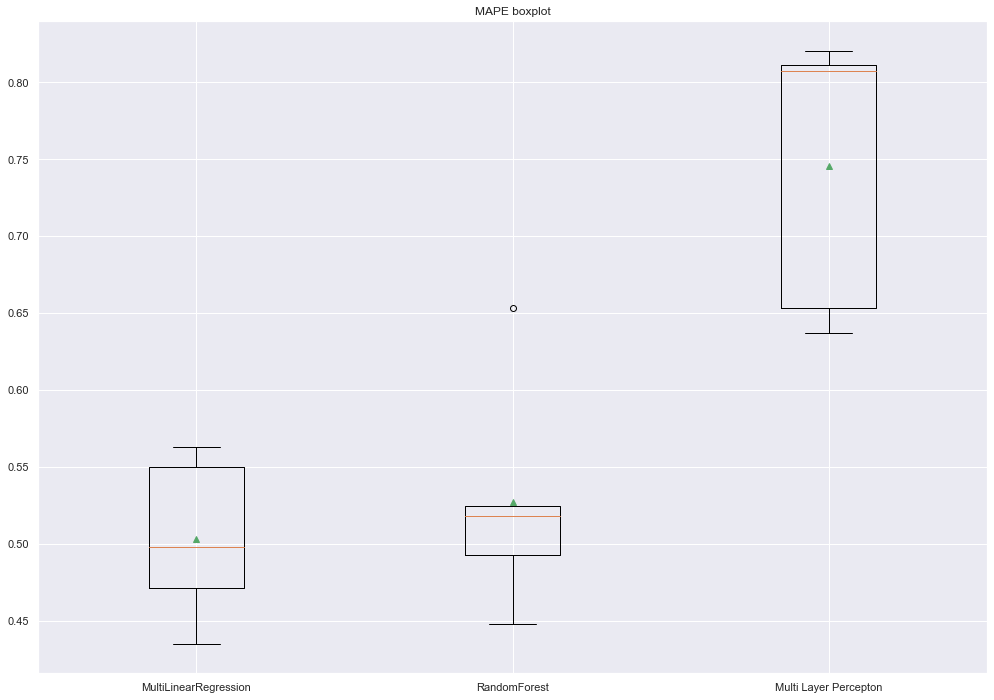

In [16]:
Box_plott_Recall = list()
for i in range(len(resultados)):
    rr = resultados[i]['test_MAPE']
    #print(rr)
    Box_plott_Recall.append(rr)

plt.figure(2)
plt.title("MAPE boxplot")
plt.boxplot(Box_plott_Recall, labels=nombres, showmeans=True)
plt.show(block=True);

    #**Ejercicio-8.**
Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores 
hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los 
hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación 
cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 


In [17]:
import warnings
from sklearn.metrics import mean_absolute_percentage_error

warnings.filterwarnings("ignore")

MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
#MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)

MLPmodel = MLPRegressor(max_iter=20000)
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GSMLP = GridSearchCV(estimator=MLPmodel,
            param_grid=({'solver':['sgd'],'hidden_layer_sizes': [(100,2),(100,5),(100,10)], 
                         'alpha':[.001,.01,1] , 'learning_rate_init':[.0001,.001,.01]}),scoring= MAPEscorer)

GSMLPfit = GSMLP.fit(XtrainvalTransf,YtrainvalTransf.values.ravel())
print(GSMLP.best_params_)
print("Best MAPE scored=%0.3f):" % GSMLP.best_score_)

{'alpha': 0.01, 'hidden_layer_sizes': (100, 10), 'learning_rate_init': 0.001, 'solver': 'sgd'}
Best MAPE scored=-9.151):


    #**Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de 
los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones

Feature: 0, Score: 0.94018
Feature: 1, Score: 1.31453
Feature: 2, Score: 0.08405
Feature: 3, Score: 0.13694
Feature: 4, Score: 0.07768
Feature: 5, Score: 0.14305
Feature: 6, Score: 0.63021
Feature: 7, Score: 0.07532
Feature: 8, Score: 0.06093


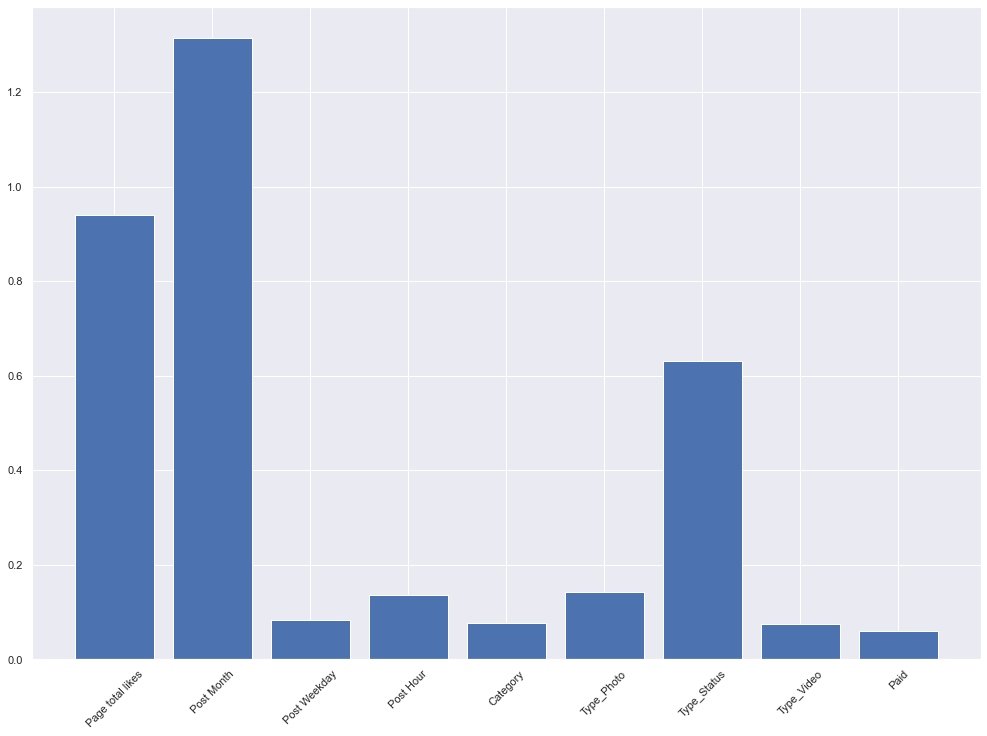

In [27]:
from sklearn.inspection import permutation_importance

#kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)

Best_MLP = MLPRegressor(alpha = .01, 
                            max_iter=20000, 
                            hidden_layer_sizes= (100,10),
                            learning_rate_init=0.001,
                            solver = 'sgd'
                           )  

Best_MLP.fit(Xtraintransf, Ytraintransf)

importance = permutation_importance(Best_MLP, Xtraintransf, Ytraintransf, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

x = [x for x in range(len(importance['importances_mean']))]
y = importance['importances_mean']

plt.bar(x, y)
plt.xticks(x, New_Labels_X, rotation = 45)
plt.show()

In [34]:
XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))

ypred = pd.DataFrame(GSMLPfit.predict(XtestTransf))

#print(ypred)

YtestFit = TransformColumnsY.fit(ytest)
YtestTransf = pd.DataFrame(YtestFit.transform(ytest))

#print(YtestTransf)


RMSE_final = float(mi_RMSE(YtestTransf,ypred))
MAE_final = float(mi_MAE(YtestTransf,ypred))
MAPE_final = float(mi_MAPE(YtestTransf,ypred))

print("Errores de red neuronal perceptron en dataset de prueba: ")
print('RMSE final:', RMSE_final)
print('MAE final:', MAE_final)
print('MAPE final:', MAPE_final)


Errores de red neuronal perceptron en dataset de prueba: 
RMSE final: 0.2673179714325488
MAE final: 0.35044461520863707
MAPE final: 5.91266325011228


    #**Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de 
factores con este modelo con un diagrama de barras

In [20]:
import warnings
from sklearn.metrics import mean_absolute_percentage_error

warnings.filterwarnings("ignore")

MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
#MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)

RFmodel = RandomForestRegressor()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GSRF = GridSearchCV(estimator=RFmodel,
            param_grid=({'n_estimators': [5,10,20],
                         'criterion': ('squared_error', 'absolute_error', 'poisson'), 
                         'max_depth': [1,3,5,7,9], 
                         'min_samples_split':[2,4,6], 
                         'min_samples_leaf': [2,4,6]}),scoring= MAPEscorer)

GSRFfit = GSRF.fit(XtrainvalTransf,YtrainvalTransf.values.ravel())
print(GSRF.best_params_)
print("Best MAPE scored=%0.3f):" % GSMLP.best_score_)

{'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 10}
Best MAPE scored=-9.151):


Feature: 0, Score: 0.27341
Feature: 1, Score: 0.01270
Feature: 2, Score: 0.02280
Feature: 3, Score: 0.01215
Feature: 4, Score: 0.01644
Feature: 5, Score: 0.05318
Feature: 6, Score: 0.45868
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.03646


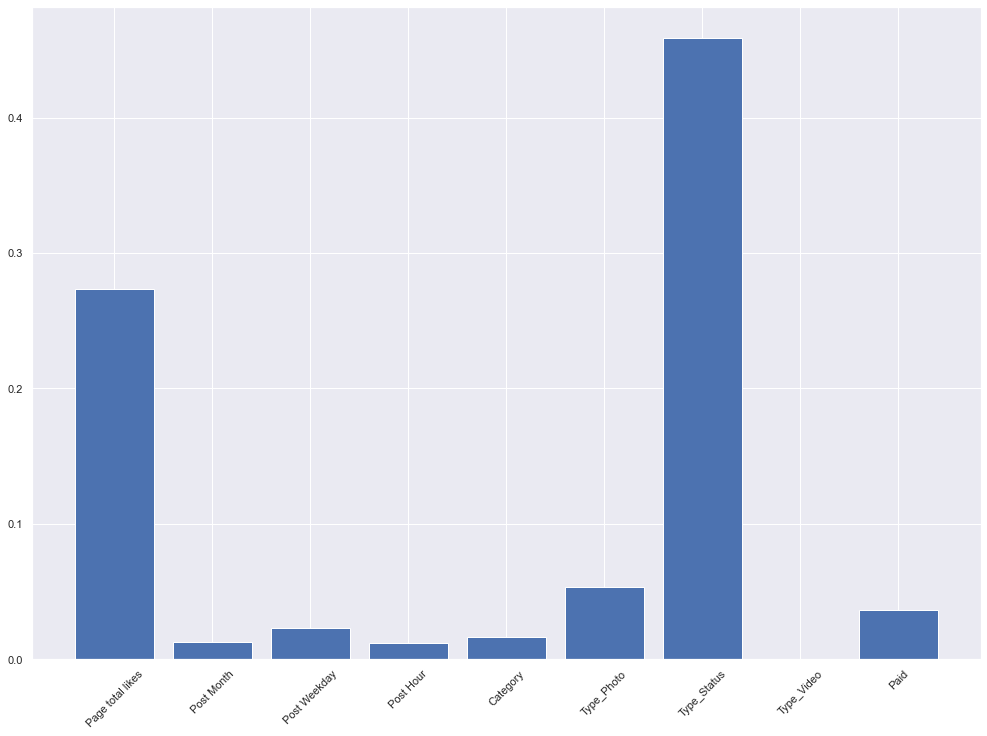

In [29]:
# Una vez inicializado y entrenada la MLP, veamos qué factores considera más importantes:

Best_RF = RandomForestRegressor(n_estimators = 10, 
                            criterion= 'absolute_error',
                            max_depth = 5,
                            min_samples_leaf = 6,
                            min_samples_split=4,
                           )  


Best_RF.fit(Xtraintransf, Ytraintransf)

importance = permutation_importance(Best_RF, Xtraintransf, Ytraintransf, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
x = [x for x in range(len(importance['importances_mean']))]
y = importance['importances_mean']

plt.bar(x, y)
plt.xticks(x, New_Labels_X, rotation = 45)
plt.show()

In [30]:

XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))

ypred = pd.DataFrame(GSRFfit.predict(XtestTransf))

#print(ypred)

YtestFit = TransformColumnsY.fit(ytest)
YtestTransf = pd.DataFrame(YtestFit.transform(ytest))

#print(YtestTransf)


print("Errores de Random Forrest en dataset de prueba: ")
# MSE-errores de test:
val_mse = mi_RMSE(YtestTransf,ypred)           
print("RMSE_val: ",train_mse)
# MAE-errores de test:
val_mae = mi_MAE(YtestTransf,ypred)          
print("MAE_val: ",train_mae)
# MAPE-errores de test:
val_mape = mi_MAPE(YtestTransf,ypred)          
print("MAPE_val: ",train_mape)

Errores de Random Forrest en dataset de prueba: 
RMSE_val:  0.43466042658408754
MAE_val:  0.4978439628319471
MAPE_val:  8.063442508131457


    #**Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores 
hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más 
adecuados) y usando el conjunto de Prueba. Y realiza     

In [23]:
import warnings

warnings.filterwarnings("ignore")

MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
#MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)

LRmodel = LinearRegression()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

GSLR = GridSearchCV(estimator=LRmodel,
            param_grid=({'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False] }),scoring= MAPEscorer)

GSLRfit = GSLR.fit(XtrainvalTransf,YtrainvalTransf)
print(GSLR.best_params_)
print("Best MAPE scored=%0.3f):" % GSMLP.best_score_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
Best MAPE scored=-9.151):


Feature: 0, Score: 0.62573
Feature: 1, Score: 1.04997
Feature: 2, Score: 0.00027
Feature: 3, Score: 0.00111
Feature: 4, Score: 0.00178
Feature: 5, Score: 0.29221
Feature: 6, Score: 0.98610
Feature: 7, Score: 0.12774
Feature: 8, Score: 0.01752


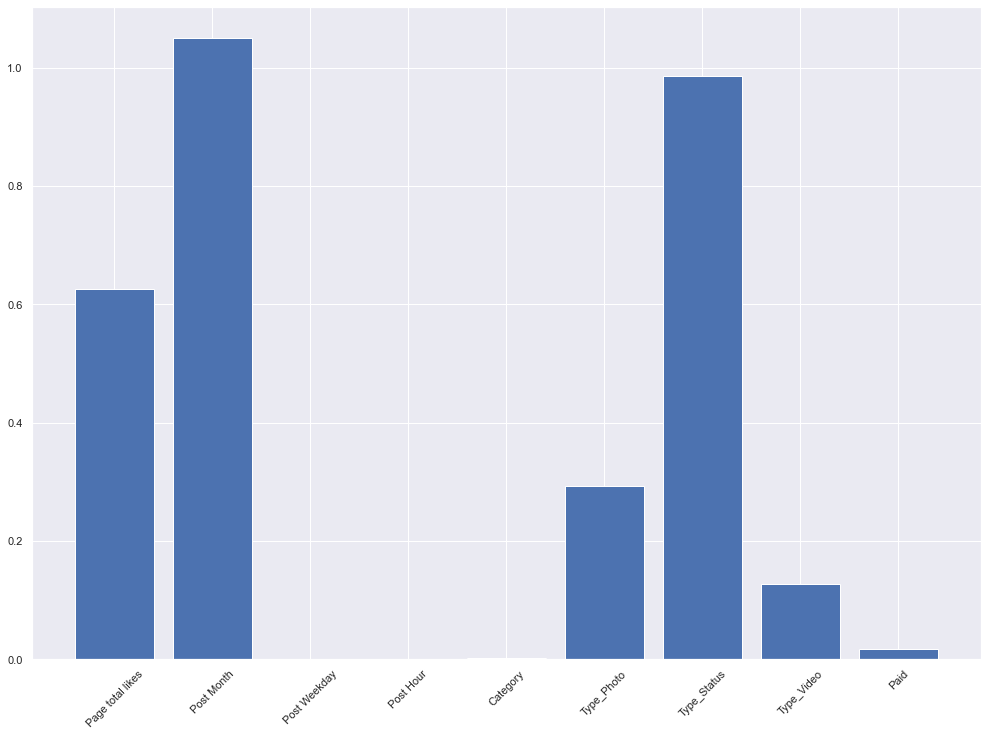

In [31]:
from distutils.file_util import copy_file
from sklearn.inspection import permutation_importance

#kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)

Best_LR = LinearRegression(copy_X=True, 
							fit_intercept=True, 
							normalize=True)  

Best_LR.fit(Xtraintransf, Ytraintransf)

importance = permutation_importance(Best_LR, Xtraintransf, Ytraintransf, n_repeats=20)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
x = [x for x in range(len(importance['importances_mean']))]
y = importance['importances_mean']

plt.bar(x, y)
plt.xticks(x, New_Labels_X, rotation = 45)
plt.show()

In [25]:
XtestFit = TransformColumns.fit(Xtest)
XtestTransf = pd.DataFrame(XtestFit.transform(Xtest))

ypred = pd.DataFrame(GSLRfit.predict(XtestTransf))

#print(ypred)

YtestFit = TransformColumnsY.fit(ytest)
YtestTransf = pd.DataFrame(YtestFit.transform(ytest))

#print(YtestTransf)

RMSE_final = float(mi_RMSE(YtestTransf,ypred))
MAE_final = float(mi_MAE(YtestTransf,ypred))
MAPE_final = float(mi_MAPE(YtestTransf,ypred))

print("Errores de Regresion Lineal Multiple en dataset de prueba: ")
print('RMSE final:', RMSE_final)
print('MAE final:', MAE_final)
print('MAPE final:', MAPE_final)

Errores de Regresion Lineal Multiple en dataset de prueba: 
RMSE final: 0.2734273473483373
MAE final: 0.36238077461123297
MAPE final: 6.124335843612898


#**Ejercicio-12.**

El artículo de Moro-Rita-Vala relata en los siguientes porcentajes, la relevancia de cada caracteristicas de entrada vs 'Lifetime Post Consumers':

    Type (sin especificar cual): 36%
    Page total likes: 17%
    Month: 15%
    Category: 10%
    Hour: 8%
    Paid: 7%
    Weekday: 7%
    *Observemos que ellos no realiza ningun tipo de one hot encoding

Sin embargo, nuestro modelo busca la relacion entre estas 7 variables de entrada, pero nos enfocamos en encontrar la relacion contra "Lifetime people who have liked your
page and engaged with your post". Para dicha salida, el articulo muestra un MAPE de 26.9%.     

En nuestra investigacion, el mejor modelo fue el de Red Neuronal Perceptron, el cual supera en la metrica MAPE ( Mean absolute percentage error) al modelo del articulo, obteniendo un valor de 5.91%.

A su vez, encontramos que la importancia de los features, se reparte de la siguiente manera:


Feature: 0, Score: 0.34062
Feature: 1, Score: 0.52624
Feature: 2, Score: 0.05481
Feature: 3, Score: 0.07615
Feature: 4, Score: 0.05297
Feature: 5, Score: 0.18731
Feature: 6, Score: 0.73491
Feature: 7, Score: 0.08933
Feature: 8, Score: 0.03443


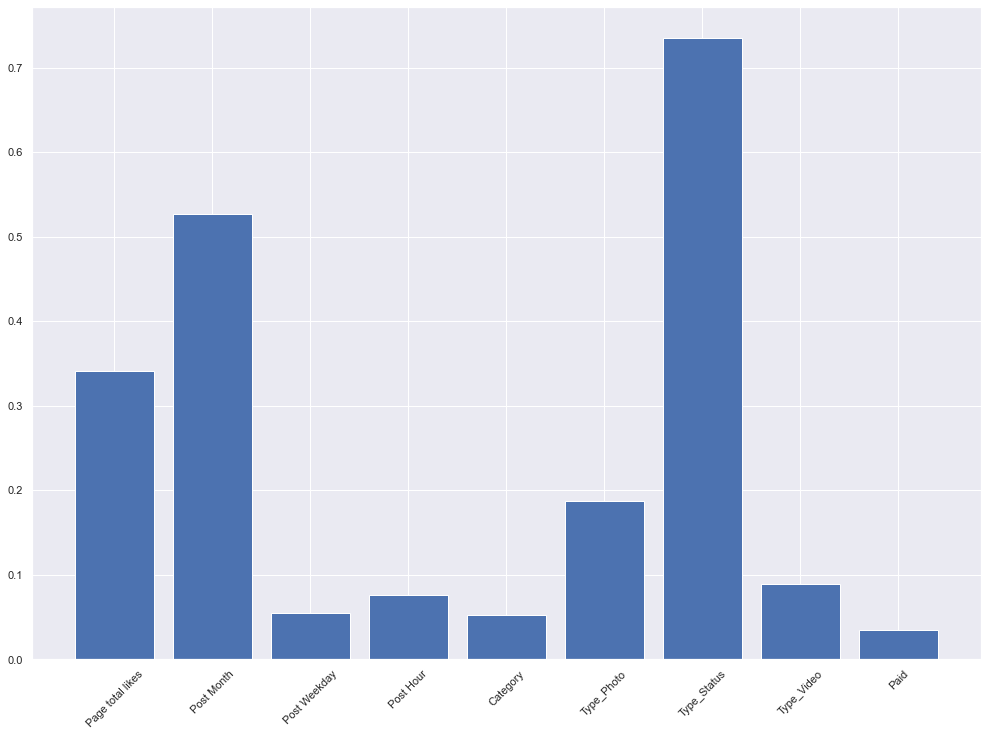

In [35]:
from sklearn.inspection import permutation_importance

#kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)

Best_MLP = MLPRegressor(alpha = .01, 
                            max_iter=20000, 
                            hidden_layer_sizes= (100,10),
                            learning_rate_init=0.001,
                            solver = 'sgd'
                           )  

Best_MLP.fit(Xtraintransf, Ytraintransf)

importance = permutation_importance(Best_MLP, Xtraintransf, Ytraintransf, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))

x = [x for x in range(len(importance['importances_mean']))]
y = importance['importances_mean']

plt.bar(x, y)
plt.xticks(x, New_Labels_X, rotation = 45)
plt.show()

###**Fin de la Actividad de la semana 7.**